## PCA Example with MNIST digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# suppress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load mnist
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# image shape
sz = train_images.shape[1]

# need to reshape and preprocess the training/testing images
train_images_vec = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
test_images_vec = test_images_vec.astype('float32') / 255

# also need to categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels_vec = to_categorical(train_labels)
test_labels_vec = to_categorical(test_labels)

In [21]:
# PCA using sklearn

# in this case, we are going to do PCA on the train_images_vec 
# (linearized MNIST digits) - we will set this to array X (just to 
# keep it visually generic, not for any other reason)

X = train_images_vec

# dimensions of X
#   N rows : number of data points (in our case, number of MNIST digitis)
#   D cols : number of dimensions (in our case, number of pixels)
print(X.shape)

# so from here on, X could be any numpy array of data points (N) 
# and dimensions (D-dimensional)

from sklearn.decomposition import PCA

# number of PCA components (P-dimensional)
nPCA = 40

# create PCA object
pca = PCA(n_components=nPCA, whiten=False, svd_solver='auto')

# two ways to fit the PCA model and transform original data to PCA dimensions

# 1) Fit the model with X and apply the dimensionality reduction on X in one step
principalComponents = pca.fit_transform(X)

# 2) first fit PCA, then transform 
pca.fit(X)
principalComponents = pca.transform(X)

# principalComponents will be N x 10 (since we assumed 10 PCA dimensions)
print(principalComponents.shape)

# get explained variance - which is useful for knowing how many PCA dimensions to assume
print(pca.explained_variance_ratio_) 

(60000, 784)
(60000, 40)
[0.0970472  0.07095962 0.06169132 0.05389452 0.04868817 0.04312258
 0.0327195  0.02883912 0.02762045 0.02357011 0.02109199 0.02023
 0.01715828 0.01692119 0.0157865  0.0148296  0.01324568 0.01276904
 0.0118727  0.0115269  0.01066172 0.01006719 0.00953578 0.00912549
 0.00883409 0.00839325 0.00812583 0.00786369 0.00744735 0.00690862
 0.00658097 0.00648142 0.00602604 0.00586547 0.00569996 0.00543573
 0.00505741 0.00487584 0.00481082 0.00470881]


In [25]:
# recover data in D-dimensional space from lower-dimensional PCA
Xrecovered = pca.inverse_transform(principalComponents)

# Xrecovered will be N x D
print(Xrecovered.shape)

(60000, 784)


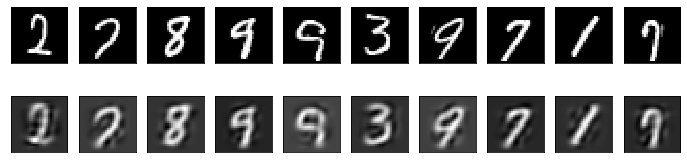

In [26]:
import numpy.random as R

# print original MNIST digits and those recovered from low-dimesional PCA
fig = plt.figure(figsize=(12, 3))
nexamples = 10
print()
for i in range(nexamples):
    # random index
    idx = R.randint(X.shape[0])
    
    ax = plt.subplot(2,nexamples,i+1)
    Ximg = X[idx,:]
    Ximg = Ximg.reshape((sz,sz))
    ax.imshow(Ximg, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])

    ax = plt.subplot(2,nexamples,nexamples+i+1)
    Ximg = Xrecovered[idx,:]
    Ximg = Ximg.reshape((sz,sz))
    ax.imshow(Ximg, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
plt.show()

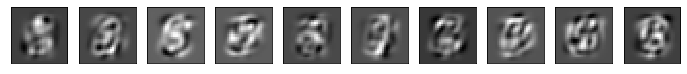

In [70]:
# generate N random novel "digits" (PCA is not a great "generative model")

N = 10
rand_principalComponents = R.randn(N, nPCA)

rand_Xrecovered = pca.inverse_transform(rand_principalComponents)

fig = plt.figure(figsize=(12, 2))
for i in range(N):
    plt.subplot(1,N,i+1)

    Ximg = rand_Xrecovered[i,:]
    Ximg = Ximg.reshape((sz,sz))
    plt.imshow(Ximg, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
plt.show()